##**Author: Sachet Utekar**

##**Task 1: Iris Flowers Classification, prediction of optimum number of clusters and representing it visually    (ML Project)**

###**DATASET: [Iris](https://archive.ics.uci.edu/ml/datasets/iris) which contains four features (length and width of sepals and petals each) of 50 samples of three species.**

##**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import datasets

##**Loading the Iris dataset**

In [2]:
iris = datasets.load_iris() # Loading the iris dataset
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

##**Analysing the Dataset**

In [3]:
iris_df.head() #See the first 5 rows which is by default

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.isna().sum() #checking missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
iris_df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
iris_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [8]:
iris_df.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [9]:
iris_df.nunique() #nunique() provides the feature to exclude the NaN values from the count of unique numbers

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [10]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values #2D-array
print(x) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

##**Finding the optimum number of clusters for k-means classification**

In [11]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [12]:
print(wcss)

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.03998724608725, 34.299712121212124, 30.014398496240602, 28.036906353450473, 26.53452922077922]


##**Data Visualisation**

In [13]:
!pip install pingouin 

     |████████████████████████████████| 205 kB 4.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=27d68f60411e06e18d36906edeb1f64629b45d6882a714a866db7dd3251e45e7
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=6d92cf11d5e8bac1ee333f312c6de8af41480da26759576a799d26c8e0cffb2c
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [14]:
import pingouin as pg

In [15]:
def plot_num(a):
    fig,axes = plt.subplots(2, figsize = (10,12))
    sb.histplot(x = iris_df[a], kde = True, bins = 10, ax = axes[0], palette = 'Pastel1')
    pg.qqplot(iris_df[a], dist='norm', ax = axes[1])
    plt.suptitle(a.title())
    plt.show()

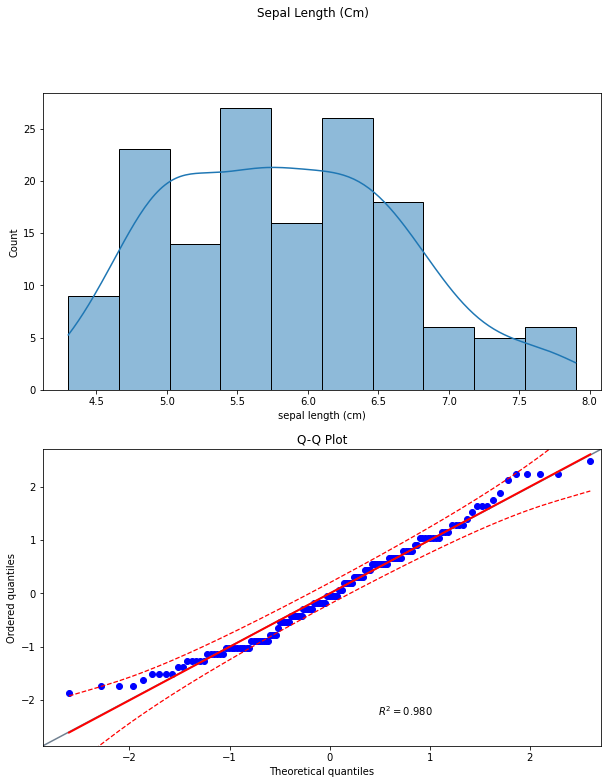

In [16]:
plot_num('sepal length (cm)')

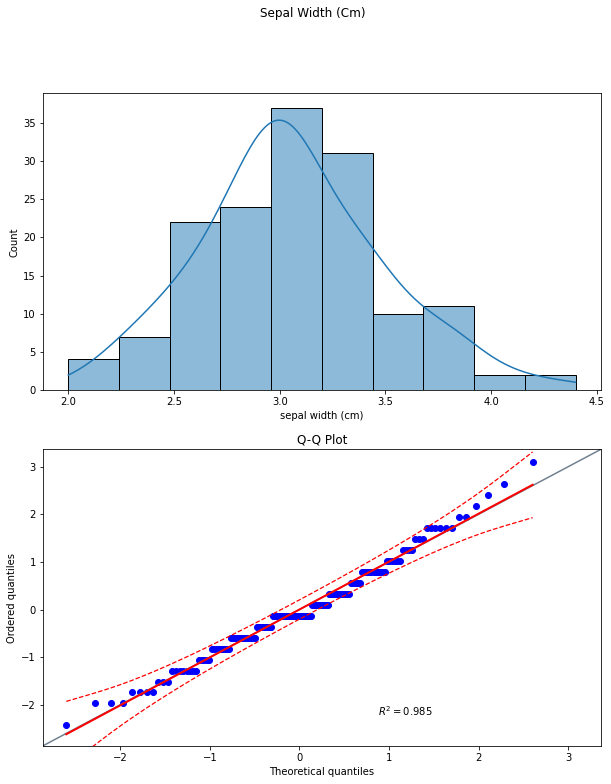

In [17]:
plot_num('sepal width (cm)')

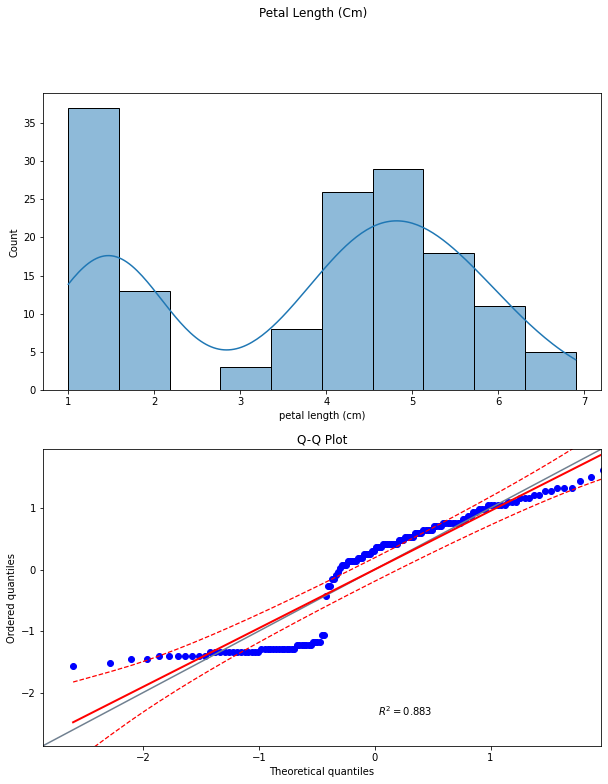

In [18]:
plot_num('petal length (cm)')

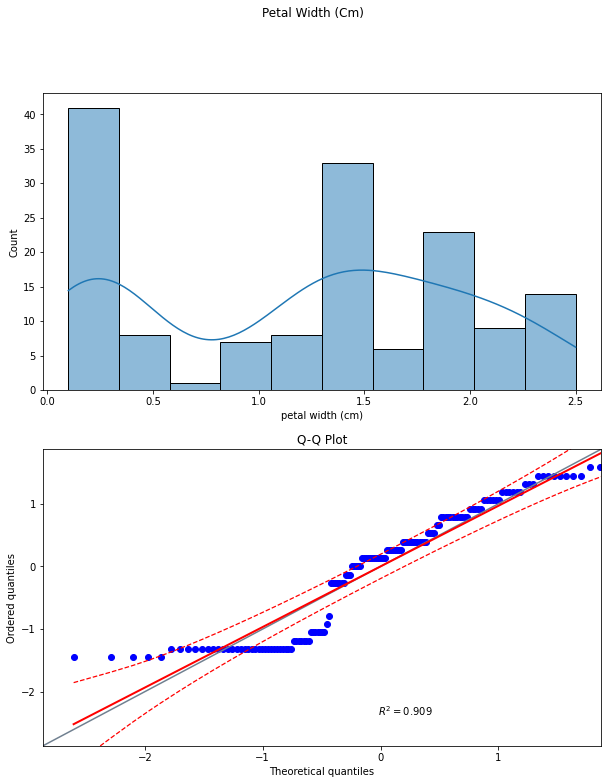

In [19]:
plot_num('petal width (cm)')

In [20]:
def plot_kde(a):
    facet=sb.FacetGrid(iris_df, aspect=3, palette='PuBu')
    facet.map(sb.kdeplot,a,shade=True)
    facet.set(xlim=(0,iris_df[a].max()))
    plt.title(a.title())
    plt.show()

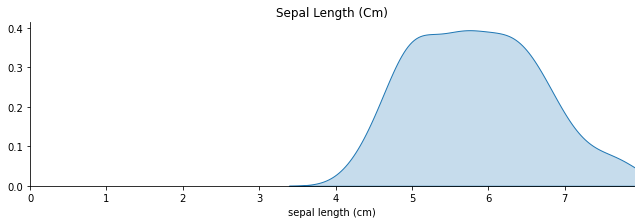

In [21]:
plot_kde('sepal length (cm)')

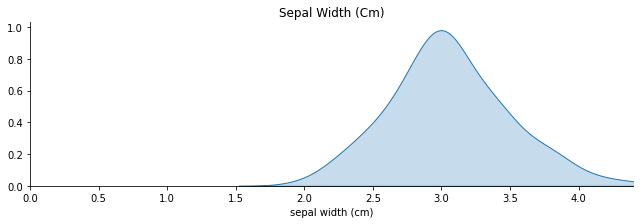

In [22]:
plot_kde('sepal width (cm)')

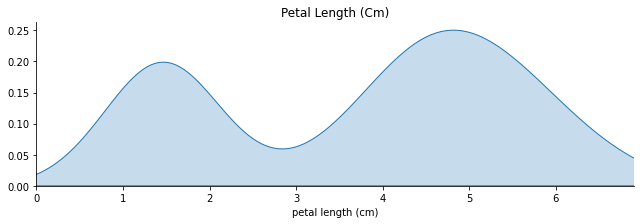

In [23]:
plot_kde('petal length (cm)')

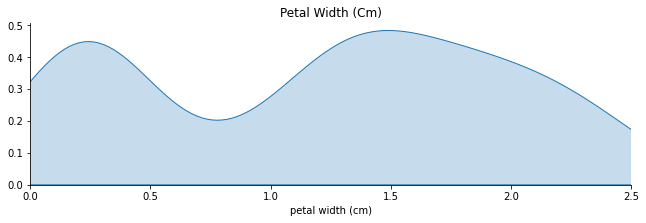

In [24]:
plot_kde('petal width (cm)')

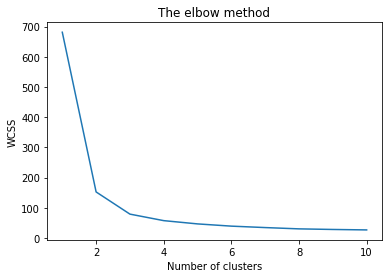

In [25]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

"The elbow method" got its name from the elbow pattern forming something like above. The optimal clusters are formed where the elbow occurs. This is when the WCSS(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly. #info

Here we choose the number of clusters as '3'.

##**Creating the k-means classifier**

In [31]:
# Applying k-means to the dataset
# Creating the k-means classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) # making prediction

In [32]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


##**Visualising the clusters**

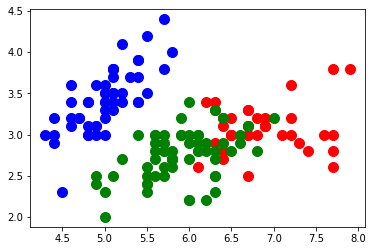

In [33]:
# Visualising the clusters 
# Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.show()

##**Plotting the centroids of the clusters**

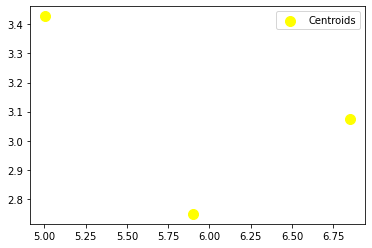

In [34]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

##**When combined both plots together**

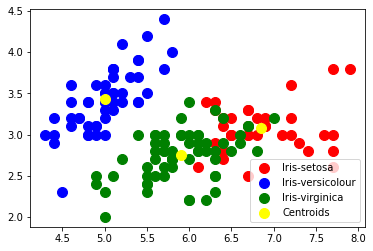

In [35]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [36]:
import pickle
pickle.dump(kmeans,open("model.pkl","wb"))